In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


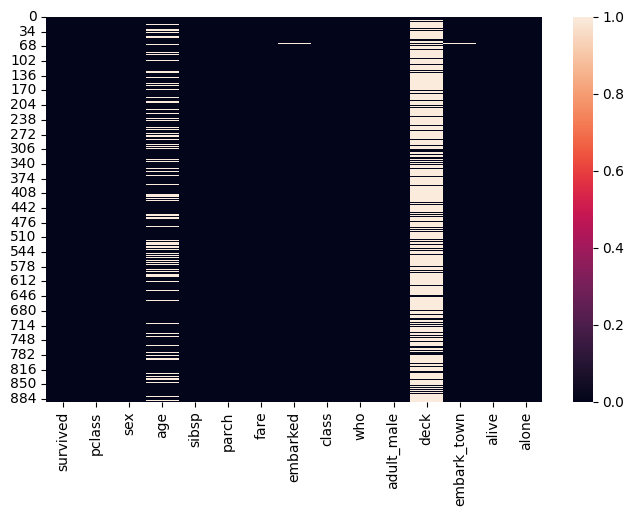

In [3]:
#to plot the missing values
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())
plt.show()

In [4]:
print(f"missing values of each column:\n{df.isnull().sum().sort_values(ascending=False)}")
print("---------------------------------------------")
print(f"percentage of missing values of each column:\n{round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)}")

missing values of each column:
deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64
---------------------------------------------
percentage of missing values of each column:
deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64


In [5]:
#fill missing values using panda
df['age']=df['age'].fillna(df['age'].median())
print(df['age'].isnull().sum())

0


In [6]:
df.drop('deck',axis=1,inplace=True)

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [8]:
#embark_town missing values
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
print(df['embark_town'].isnull().sum())
print('-------------------------------------')

#embarked missing values
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
print(df['embarked'].isnull().sum())


0
-------------------------------------
0


In [11]:
#we can aslo impute using sk learn 
from sklearn.impute import SimpleImputer
data=sns.load_dataset('titanic')

#impute the ade column using simpleimputer
imputer=SimpleImputer(strategy='median')
data['age']=imputer.fit_transform(data[['age']])
print(data.isnull().sum().sort_values(ascending=False))




deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64


# Standard Scaling


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
# make an example dataset
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'height':[160,170,180,190,200],
    'weight':[55,60,65,70,75]
})

#convert this dataframe into pandas dataframe
df=pd.DataFrame(df)
df.head()

,age,height,weight
0,25,160,55
1,30,170,60
2,35,180,65
3,40,190,70
4,45,200,75


In [9]:
#import the scaler
scaler=StandardScaler()

#fith the scaler on data
scaled_df=scaler.fit_transform(df)  
scaled_df  

#convert this data into pandas dataframe
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df


,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# MIn-Max SCaler

In [16]:
#import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#make an example dataframe
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'height':[160,170,180,190,200],
    'weight':[55,60,65,70,75]
})

#convert this dataframe into pandas dataframe
df=pd.DataFrame(df)
print(f"Data before minmaxscaler:\n{df.head()}")

print("------------------------------------")

#import  the scaler
scaled_df=MinMaxScaler()
#fit the scaler
scaled_df=scaled_df.fit_transform(df)

#convert this data into pandas dataframe
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

Data before minmaxscaler:
   age  height  weight
0   25     160      55
1   30     170      60
2   35     180      65
3   40     190      70
4   45     200      75
------------------------------------


,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# Max absolute scaler


In [17]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

#make an example dataframe
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'height':[160,170,180,190,200],
    'weight':[55,60,65,70,75]
})

#convert this dataframe into pandas dataframe
df=pd.DataFrame(df)
print(f"Data before maxabsscaler:\n{df.head()}")

print("------------------------------------")

#import  the scaler
scaled_df=MaxAbsScaler()
#fit the scaler
scaled_df=scaled_df.fit_transform(df)

#convert this data into pandas dataframe
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df


Data before maxabsscaler:
   age  height  weight
0   25     160      55
1   30     170      60
2   35     180      65
3   40     190      70
4   45     200      75
------------------------------------


,age,height,weight
0,0.555556,0.80,0.733333
1,0.666667,0.85,0.800000
2,0.777778,0.90,0.866667
3,0.888889,0.95,0.933333
4,1.000000,1.00,1.000000


# Robust scaler

In [19]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

#make an example dataframe
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'height':[160,170,180,190,200],
    'weight':[55,60,65,70,75]
})

#convert this dataframe into pandas dataframe
df=pd.DataFrame(df)
print(f"Data before robustscaler:\n{df.head()}")

print("------------------------------------")

#import  the scaler
scaled_df=RobustScaler()
#fit the scaler
scaled_df=scaled_df.fit_transform(df)

#convert this data into pandas dataframe
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
print(f"Data after robustscaler:\n{scaled_df}")


Data before robustscaler:
   age  height  weight
0   25     160      55
1   30     170      60
2   35     180      65
3   40     190      70
4   45     200      75
------------------------------------
Data after robustscaler:
   age  height  weight
0 -1.0    -1.0    -1.0
1 -0.5    -0.5    -0.5
2  0.0     0.0     0.0
3  0.5     0.5     0.5
4  1.0     1.0     1.0


---
# Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [2]:
#generate non normal data(exponential distribution)
np.random.seed(0)
df=np.random.exponential(size=1000,scale=2)
df=pd.DataFrame(df,columns=['values'])
df.head()



,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [3]:
df.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

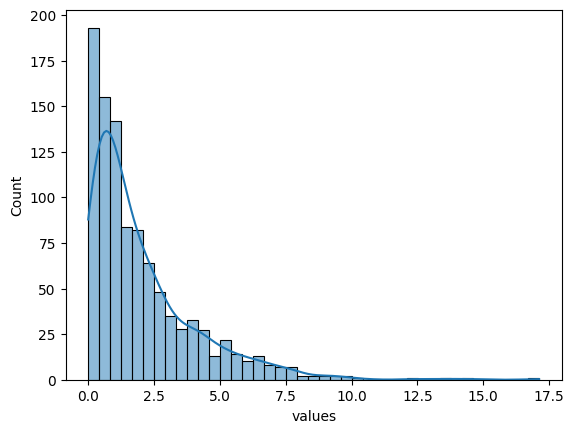

In [4]:
sns.histplot(df['values'],kde=True)

In [7]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer


pt_boxcox=PowerTransformer(method='box-cox')    #data must be positive for box-cox transformation
pt_yeo_jhonson=PowerTransformer(method='yeo-johnson')
pt_noermal=QuantileTransformer(output_distribution='normal')

#fit the box cox
df['BoX-Cox']=pt_boxcox.fit_transform(df[['values']]+1)

#fit the yeo johnson
df['Yeo-Johnson']=pt_yeo_jhonson.fit_transform(df[['values']])

#fit the normal
df['Quantile']=pt_noermal.fit_transform(df[['values']])

df.head()


,values,BoX-Cox,Yeo-Johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


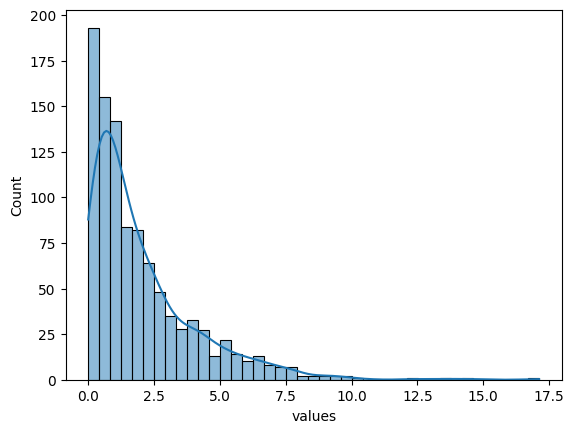

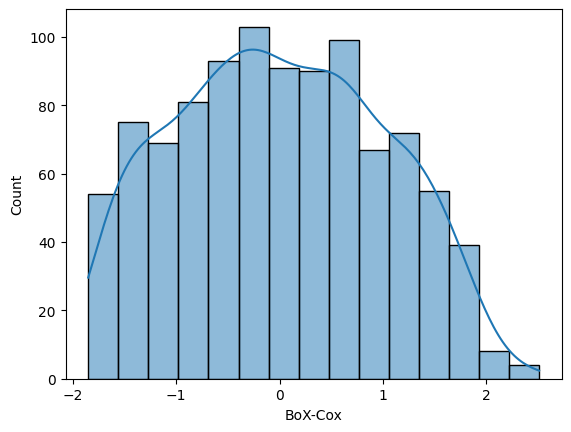

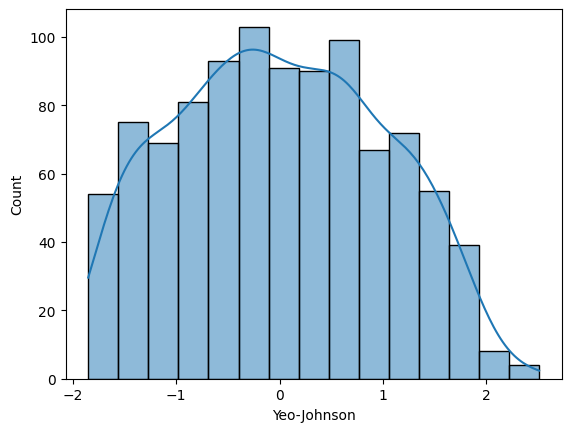

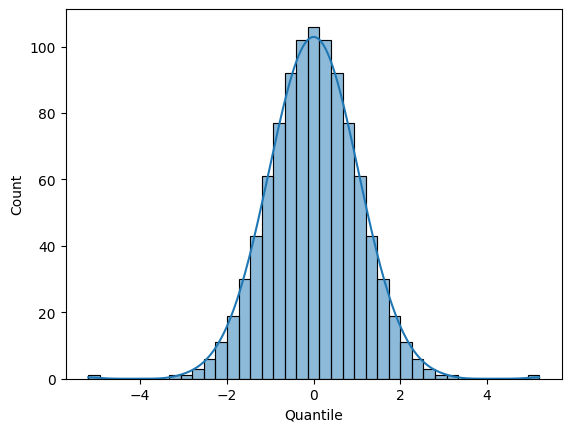

In [8]:
#create seperate histplot of all columns usinfg for loop
for col  in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()



# Encoding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.value_counts('time')

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [6]:
df.value_counts('encoded_time')

encoded_time
0    176
1     68
Name: count, dtype: int64

In [5]:
#lets encode the time by using label encoder using sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

le=LabelEncoder()

df['encoded_time']=le.fit_transform(df['time'])
df.head()



,total_bill,tip,sex,smoker,day,time,size,encoded_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [7]:
df.value_counts('day')

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [13]:
df.value_counts('encoded_day')

encoded_day
2.0    87
3.0    76
0.0    62
1.0    19
Name: count, dtype: int64

In [12]:
oe=OrdinalEncoder(categories=[['Thur','Fri','Sat','Sun']])

df['encoded_day']=oe.fit_transform(df[['day']])
df.head()



,total_bill,tip,sex,smoker,day,time,size,encoded_time,encoded_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,3.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0


In [15]:
onehot=OrdinalEncoder()

df['one_hot']=onehot.fit_transform(df[['smoker']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time,encoded_day,one_hot
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,2.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,2.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,2.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2.0,0.0


# simple linear regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

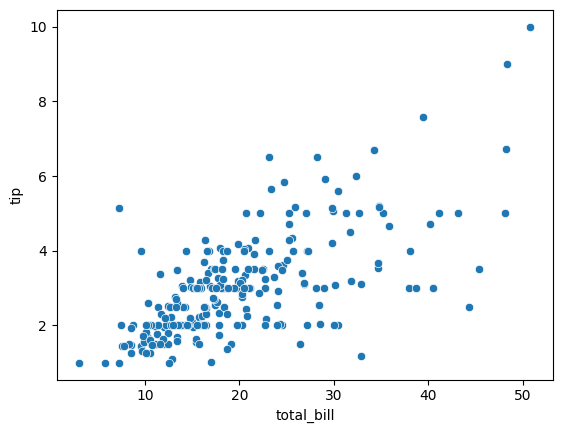

In [3]:
sns.scatterplot(x='total_bill',y='tip',data=df)

In [4]:
#split the data into x and y

x=df[['total_bill']]
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=df[['tip']]



In [5]:
#split the data into train test  split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
#call the model
model=LinearRegression()


In [7]:
#fit the model
model.fit(x_train,y_train)

LinearRegression()

In [8]:
#predict
y_pred=model.predict(x_test)

In [9]:
#evaluate the model

print(f"r2 score:{r2_score(y_test,y_pred)}")
print(f"mean squared error:{mean_squared_error(y_test,y_pred)}")
print(f"root mean squared error:{np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score:0.2924030064101244
mean squared error:1.1695503204568503
root mean squared error:1.0814574982202723


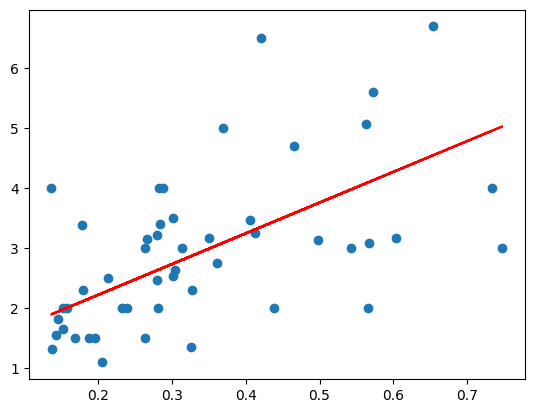

In [12]:
#plot the model

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.show()

# `Logistic Regression`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#preprocess the data
#remove the deck column
df.drop('deck', axis=1,inplace=True)
#impute the miussing values
df['age']=df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

#encoding the categorical variable using for loop
for col in df.columns:
    if df[col].dtype=='object'or df[col].dtype.name=='category':
        df[col]=LabelEncoder().fit_transform(df[col])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [4]:
X=df.drop('survived',axis=1)
y=df['survived']

In [5]:
#Train test split the data
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [6]:
model=LogisticRegression()


In [7]:
#train the model
model.fit(X_train,y_train)

c:\Users\Zain Comp\.conda\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
#predict the values
y_pred=model.predict(X_test)

In [9]:
#evaluee the model

print(f"precision score:{precision_score(y_test,y_pred)}")
print(f"recall score:{recall_score(y_test,y_pred)}")
print(f"accuracy score:{accuracy_score(y_test,y_pred)}")
print(f"f1 score:{f1_score(y_test,y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test,y_pred)}")


precision score:1.0
recall score:1.0
accuracy score:1.0
f1 score:1.0
Confusion matrix:
[[103   0]
 [  0  76]]


Text(50.722222222222214, 0.5, 'actual')

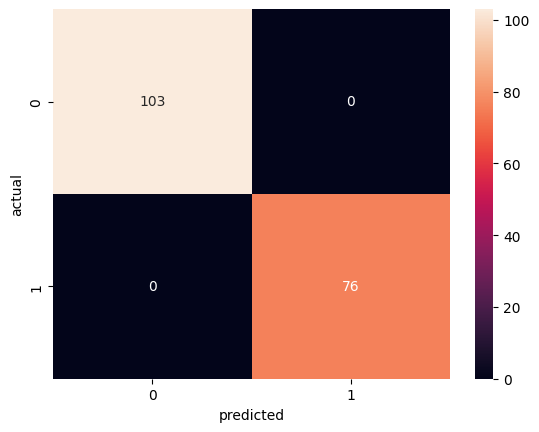

In [10]:
#plot the confusion matrix

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')